<div style="
  text-align: center; 
  color: white; 
  background: linear-gradient(135deg, #2e8b57, #3cb371); 
  padding: 25px; 
  border-radius: 12px;
  box-shadow: 0 4px 10px rgba(0,0,0,0.2);
  max-width: 600px;
  margin: 30px auto;
">
  <h1 style="margin: 0; font-size: 2.2em;">Waste Management Prediction</h1>
  <p style="font-size: 18px; margin-top: 8px; opacity: 0.95;">
    Optimizing sustainability through data-driven insights
  </p>
</div>

# 1. Problem Statement:
> *The objective of this Hackathon is to develop a machine learning model that
predicts the recycling rate (the target variable, "Recycling Rate (%)") for a given set
of city-specific waste management attributes, such as waste type, population
density, and municipal efficiency. This is primarily a regression problem, where
the goal is to minimize prediction error (e.g., Root Mean Squared Error, RMSE). The
challenge leverages the Waste Management and Recycling in India dataset,
enabling participants to explore data-driven insights that can optimize waste
management systems, reduce environmental impact, and inform urban policymaking. Participants will analyze features like waste generation, cost of
management, and landfill capacity to derive actionable solutions, simulating realworld decision-making in sustainable urban planning.*

# 2. Data - Explanation:
> *The Waste Management and Recycling in India dataset is a comprehensive
collection of attributes related to waste generation, recycling, and disposal
practices across various Indian cities. Sourced from simulated data based on realworld waste management trends in India, this dataset spans 2019–2023 and covers
multiple waste types, including plastic, organic, electronic, construction, and
hazardous waste. It is pivotal for developing predictive models that support
sustainable waste management—a data-driven approach to optimize municipal
systems, reduce landfill dependency, and enhance recycling efforts. Each row in the
dataset represents a unique combination of city, waste type, and management
attributes, paired with outcomes like recycling rates or disposal methods, making it
an ideal resource for building and evaluating machine learning models*

##  Dataset Overview

- **Source**: Simulated data based on Indian municipal waste practices  
- **Target**: Predict **Recycling Rate (%)** (regression)

###  Features

- `City/District`: Name of city (categorical)  
- `Waste Type`: Type of waste (categorical)  
- `Waste Generated (Tons/Day)`: Daily waste amount  
- `Recycling Rate (%)`: % recycled (target)  
- `Population Density`: People per km²  
- `Municipal Efficiency Score`: 1–10 rating  
- `Disposal Method`: Landfill, Recycling, etc. (classification target)  
- `Cost of Waste Management`: ₹ per ton  
- `Awareness Campaigns Count`: Campaigns per year  
- `Landfill Name`: Site name  
- `Landfill Location`: Latitude & Longitude  
- `Landfill Capacity`: Max tons  
- `Year`: 2019–2023

###  Challenges

- Encoding categorical features  
- Handling class imbalance  
- Feature engineering for time & location  
- Managing missing/noisy data  
- Combining mixed data types

# 3. Import Libraries

In [120]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# 4. Data Ingestion
> Remember, we have already prepared cleaned_data (unscaled) for EDA in the data_preparation notebook

In [149]:
df = pd.read_csv('../data/processed/Waste_Management_and_Recycling_India_cleaned.csv')
df.head()

,city/district,waste_type,waste_generated_(tons/day),recycling_rate_(%),population_density_(people/km²),municipal_efficiency_score_(1_10),disposal_method,cost_of_waste_management_(₹/ton),awareness_campaigns_count,landfill_name,"landfill_location_(lat,_long)",landfill_capacity_(tons),year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,1970
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,1970
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,1970
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,1970
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,1970


# 5. Data Summary and Metadata

In [122]:
# Dataset shape
rows, cols = df.shape
print(f"Dataset contains {rows} rows and {cols} columns.")

Dataset contains 850 rows and 13 columns.


In [123]:
# Summary statistics
df.describe().round(2)

,waste_generated_(tons/day),recycling_rate_(%),population_density_(people/km²),municipal_efficiency_score_(1_10),cost_of_waste_management_(₹/ton),awareness_campaigns_count,landfill_capacity_(tons),year
count,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.0
mean,5262.25,57.08,13489.71,7.40,2778.46,9.90,58934.62,1970.0
std,2786.98,16.13,6631.08,1.72,1276.33,6.07,19413.63,0.0
min,511.00,30.00,2335.00,5.00,503.00,0.00,22690.00,1970.0
25%,2865.75,43.00,7927.00,6.00,1647.50,5.00,45575.00,1970.0
50%,5283.00,56.00,12579.50,7.00,2853.00,10.00,61038.50,1970.0
75%,7757.25,71.00,19087.00,9.00,3855.00,15.00,71127.00,1970.0
max,9980.00,85.00,24032.00,10.00,4999.00,20.00,98646.00,1970.0


### 5.1 Data Profiling

In [172]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Waste Management Dataset Profiling Report", explorative=True)
profile.to_file("../reports/waste_management_dataset_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 462.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Key Insights from Dataset**

* **Waste generation** averages **5,262 tons/day**, but some cities produce almost **10,000 tons/day**.
* **Recycling rate** averages **57%**; top 25% exceed **71%**, bottom start at **30%**.
* **Population density** is high (~13,490 people/km²), likely influencing waste volumes.
* **Municipal efficiency** averages **7.4/10**, no extreme underperformers.
* **Costs** vary widely (₹503–₹4,999/ton), suggesting differences in infrastructure or efficiency.
* **Awareness campaigns** range from none to 20/year — possibly linked to recycling success.
* **Landfill capacity** varies greatly; high-waste cities with low capacity face overflow risks.

**Opportunities:** Focus on high-waste, low-recycling cities, evaluate cost-effectiveness, and strengthen landfill planning.

# 6. EDA (Exploratory Data Analysis)

## 6.1 Univariate Analysis
- Numeric Distribution
- Categorical Distribution

In [124]:
sns.set(style="whitegrid")

colorhunt_palette = [
    '#FF6B6B',  # Coral Red
    '#FFD93D',  # Mustard Yellow
    '#6BCB77',  # Mint Green
    '#4D96FF',  # Sky Blue
    '#843B62',  # Plum
    '#F9F871',  # Lemon
    '#FF9F1C',  # Orange
    '#2EC4B6',  # Turquoise
    '#A393EB',  # Lavender
    '#E4BAD4'   # Rose Pink
]

In [125]:
# Selected numeric columns
numeric_cols = df.drop(columns=['year']).select_dtypes(include=[np.number]).columns.tolist()

# Selected categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numeric columns: 7
Categorical columns: 5


### 6.1.1 Numeric Distributions

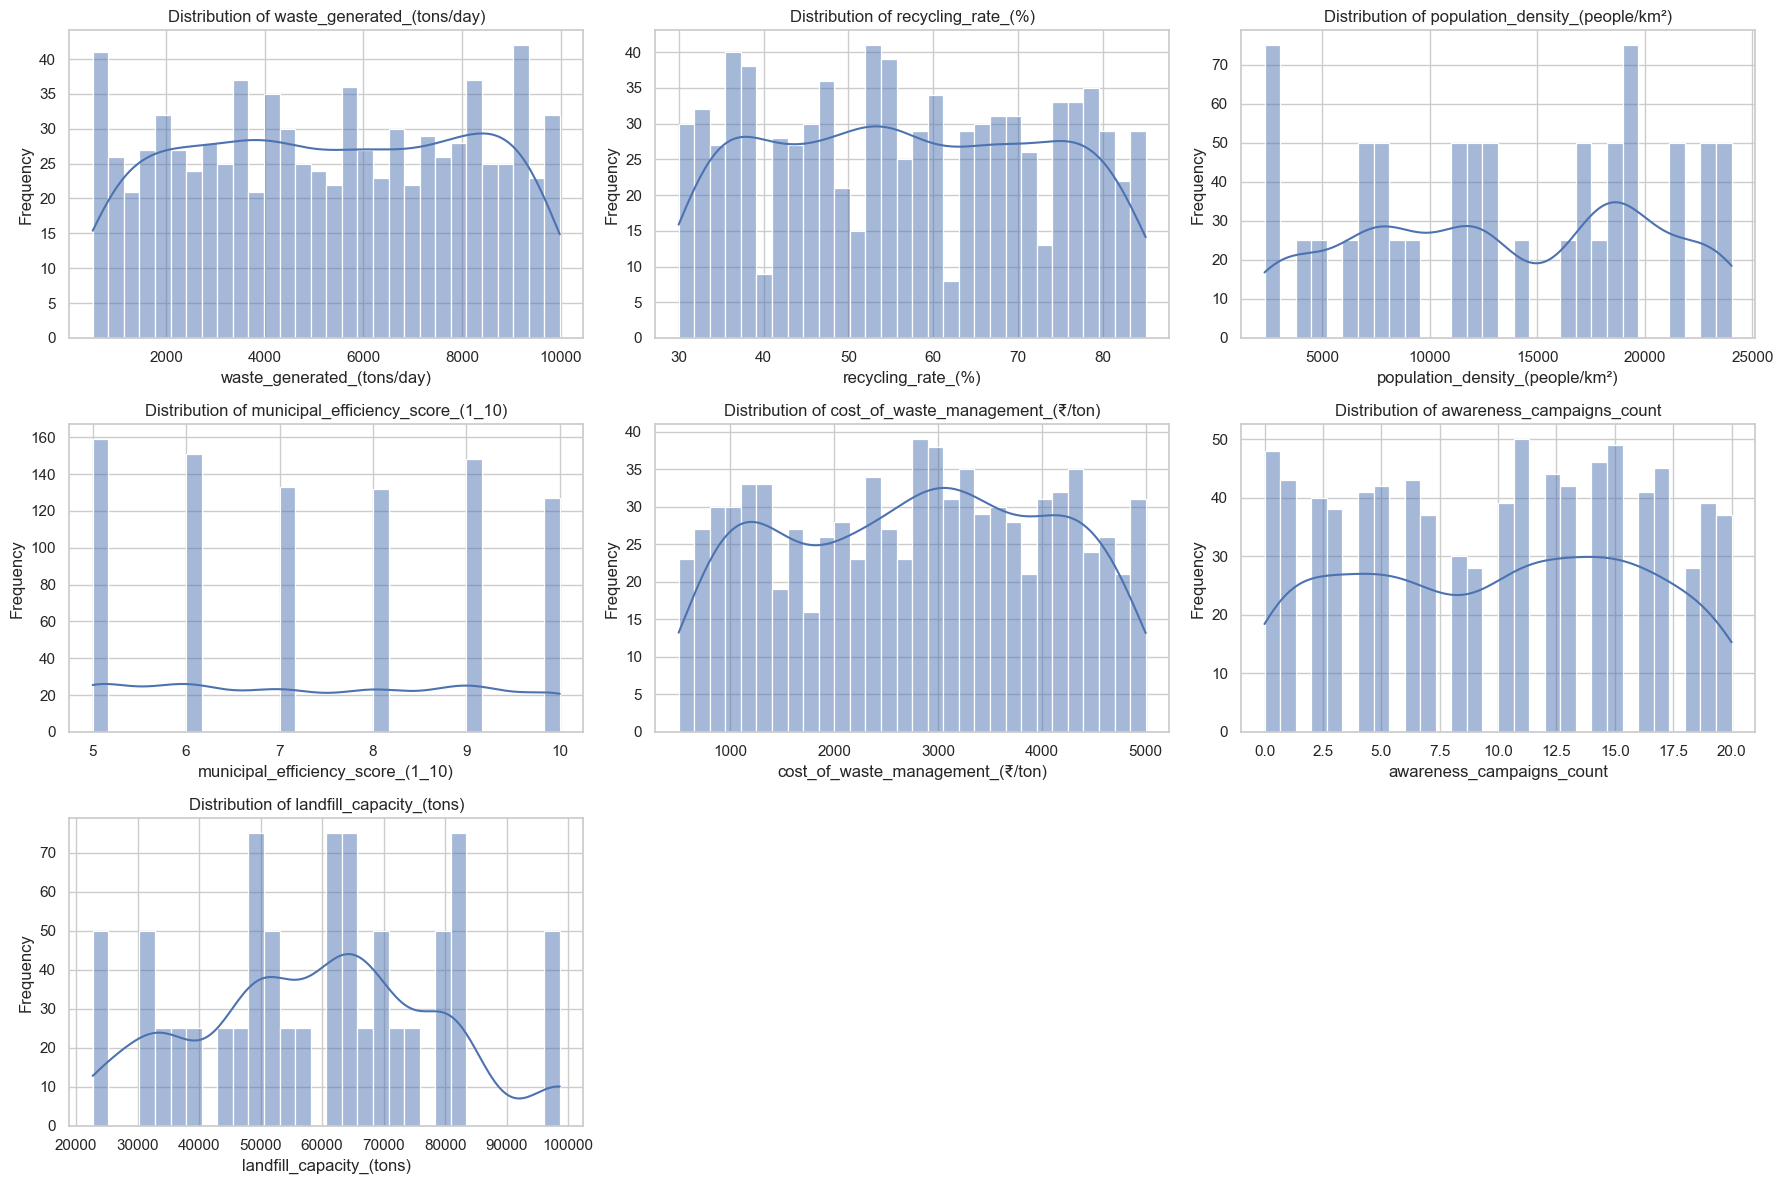

In [126]:
# Create grid layout for all numeric distributions
rows = (len(numeric_cols) + 2) // 3
cols = 3

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 6.1.2 Box Plots for Numeric Features

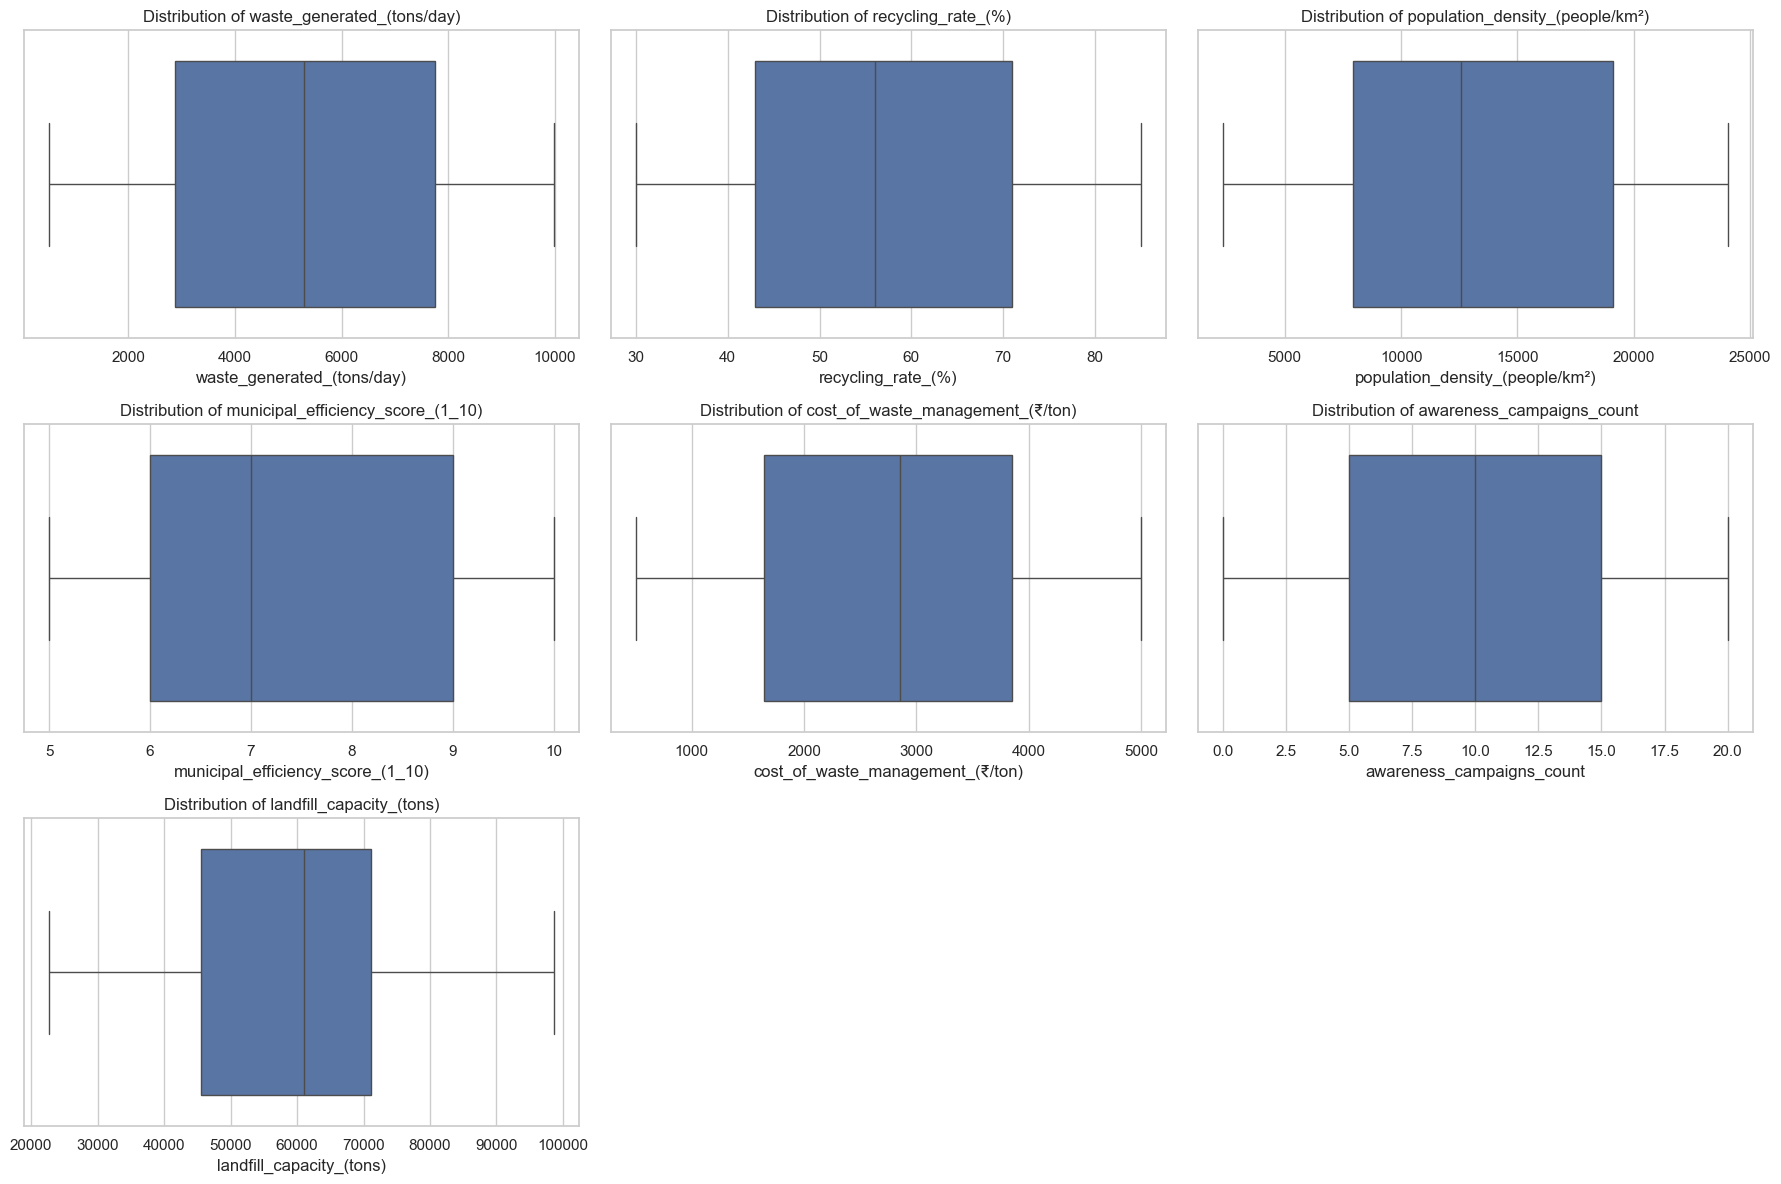

In [127]:
# Create box plots for all numeric variables
rows = (len(numeric_cols) + 2) // 3
cols = 3

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### 6.1.3 Categorical Distributions

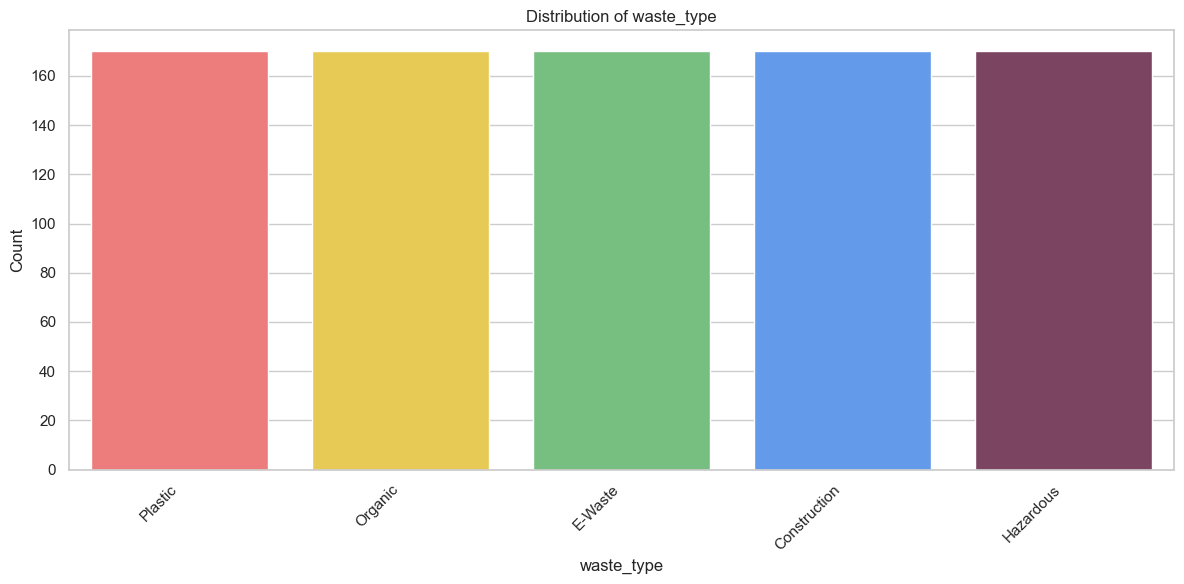

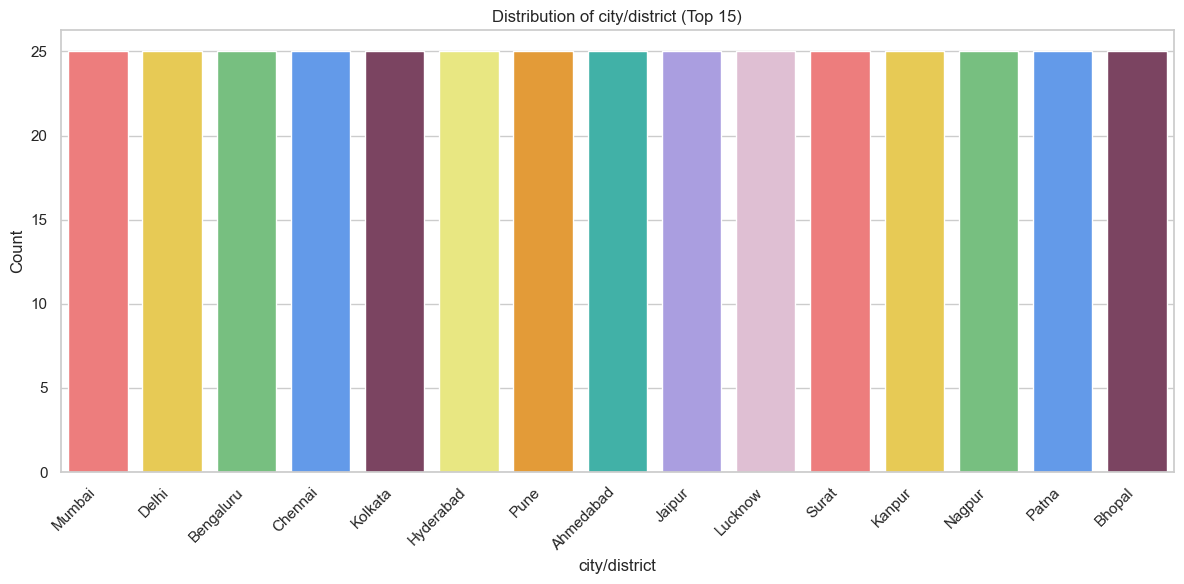

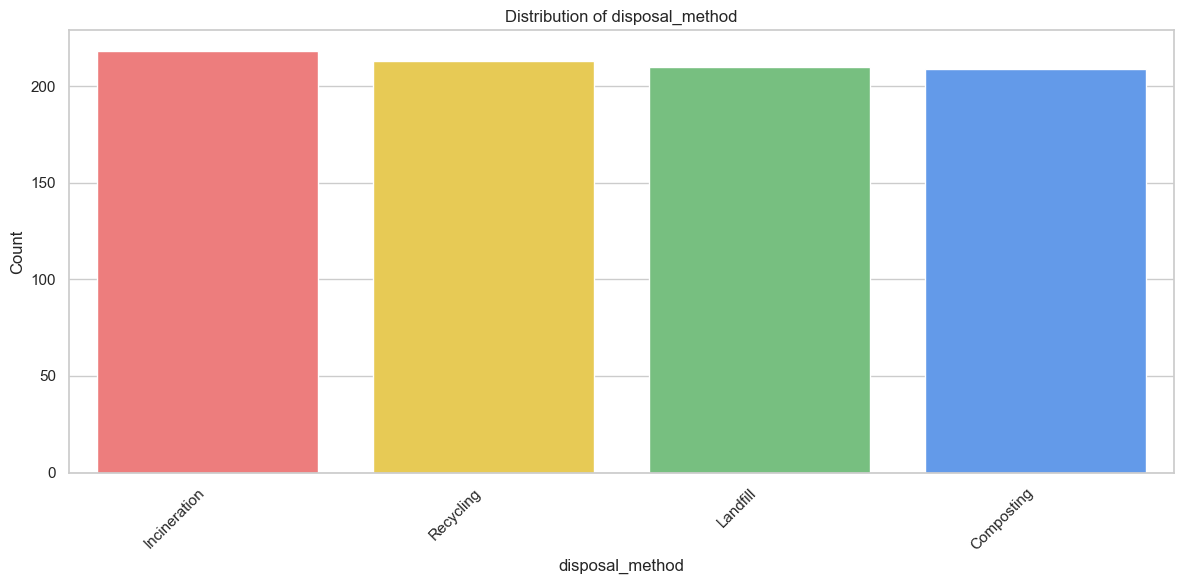

In [128]:
# Plot distributions for key categorical columns
dist_cat = ['waste_type', 'city/district', 'disposal_method']

for col in dist_cat:
    plt.figure(figsize=(12, 6))
    count_data = df[col].value_counts().sort_values(ascending=False)
    
    # Limit to top 15 if there are many categories
    if len(count_data) > 15 and col == 'city/district':
        count_data = count_data.head(15)
        plt.title(f"Distribution of {col} (Top 15)")
    else:
        plt.title(f"Distribution of {col}")
    
    sns.barplot(x=count_data.index, y=count_data.values, palette=colorhunt_palette[:len(count_data)])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

## 6.2 Bivariate Analysis

### 6.2.1 Correlation Analysis

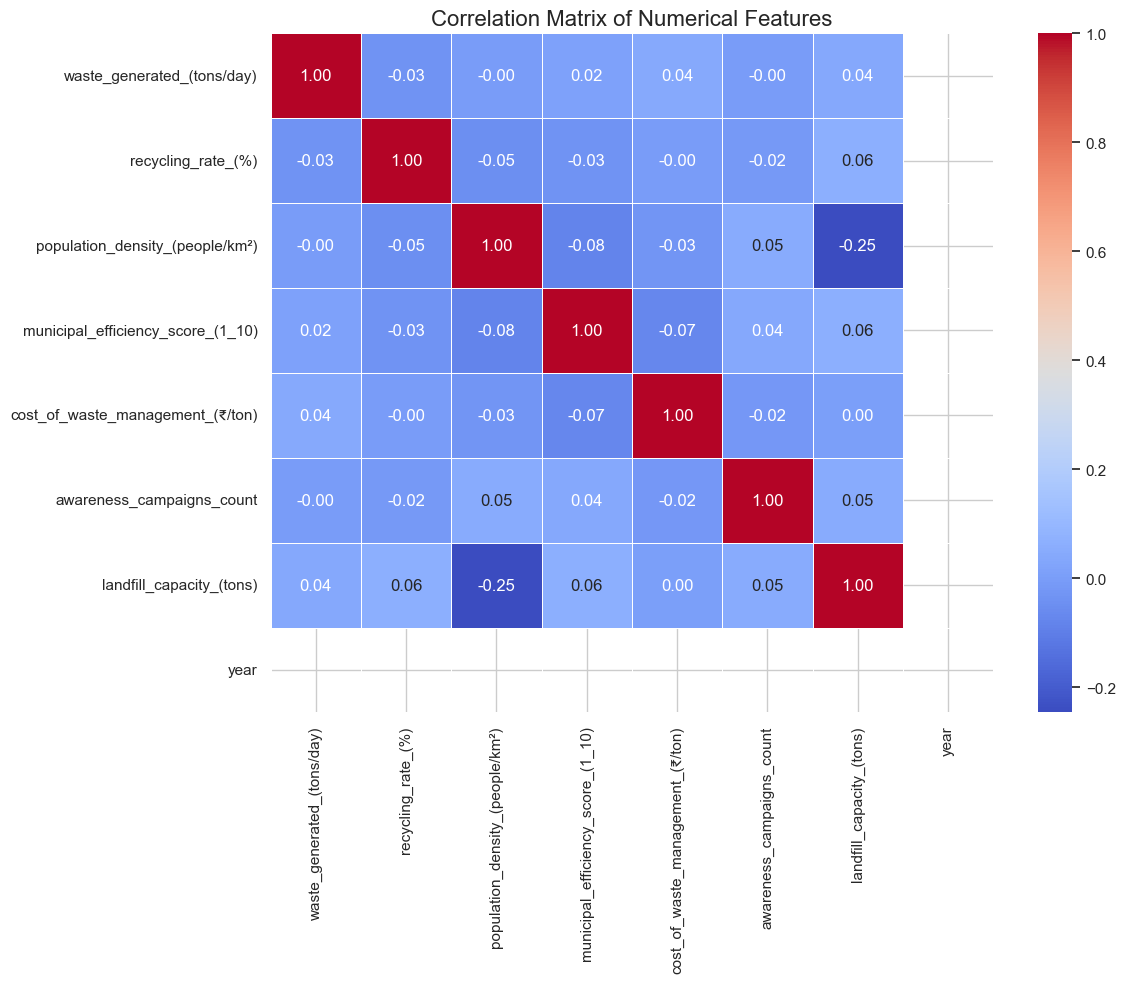

In [129]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Generate heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

### 6.2.2 Waste Generated by City/District

In [130]:
# Aggregate waste generation by city
waste_city = df.groupby('city/district')['waste_generated_(tons/day)'].sum().reset_index()
waste_city.sort_values('waste_generated_(tons/day)', ascending=False, inplace=True)
waste_city.head(15)

,city/district,waste_generated_(tons/day)
14,Jaipur,157795
28,Ranchi,152430
18,Lucknow,152352
22,Mumbai,149343
5,Bhopal,146447
24,Nashik,145464
12,Indore,144352
20,Madurai,144260
25,Patna,143068
29,Surat,142886


### 6.2.3 Top 10 Cities in Waste Generation

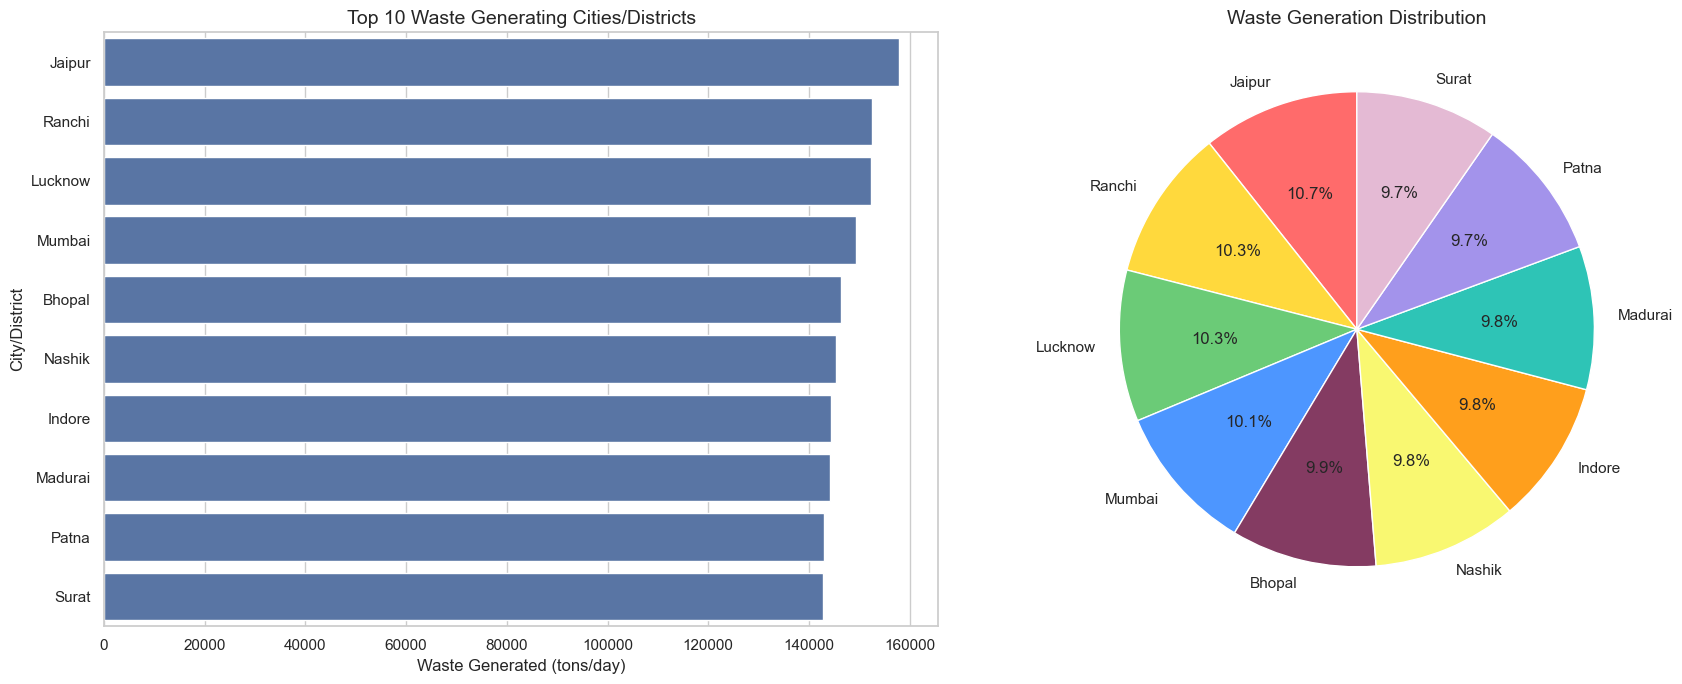

In [131]:
# top 10 waste generating cities
top_10_waste_city = waste_city.head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Bar plot
sns.barplot(x='waste_generated_(tons/day)', y='city/district', data=top_10_waste_city, ax=axes[0])
axes[0].set_title('Top 10 Waste Generating Cities/Districts', fontsize=14)
axes[0].set_xlabel('Waste Generated (tons/day)', fontsize=12)
axes[0].set_ylabel('City/District', fontsize=12)

# Pie chart
axes[1].pie(
    top_10_waste_city['waste_generated_(tons/day)'], 
    labels=top_10_waste_city['city/district'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colorhunt_palette
)
axes[1].set_title('Waste Generation Distribution', fontsize=14)

plt.tight_layout()
plt.show()

## Insights:
- Jaipur leads in waste generation, followed by Ranchi, Lucknow and others.

### 6.2.4 Waste Generated By Type

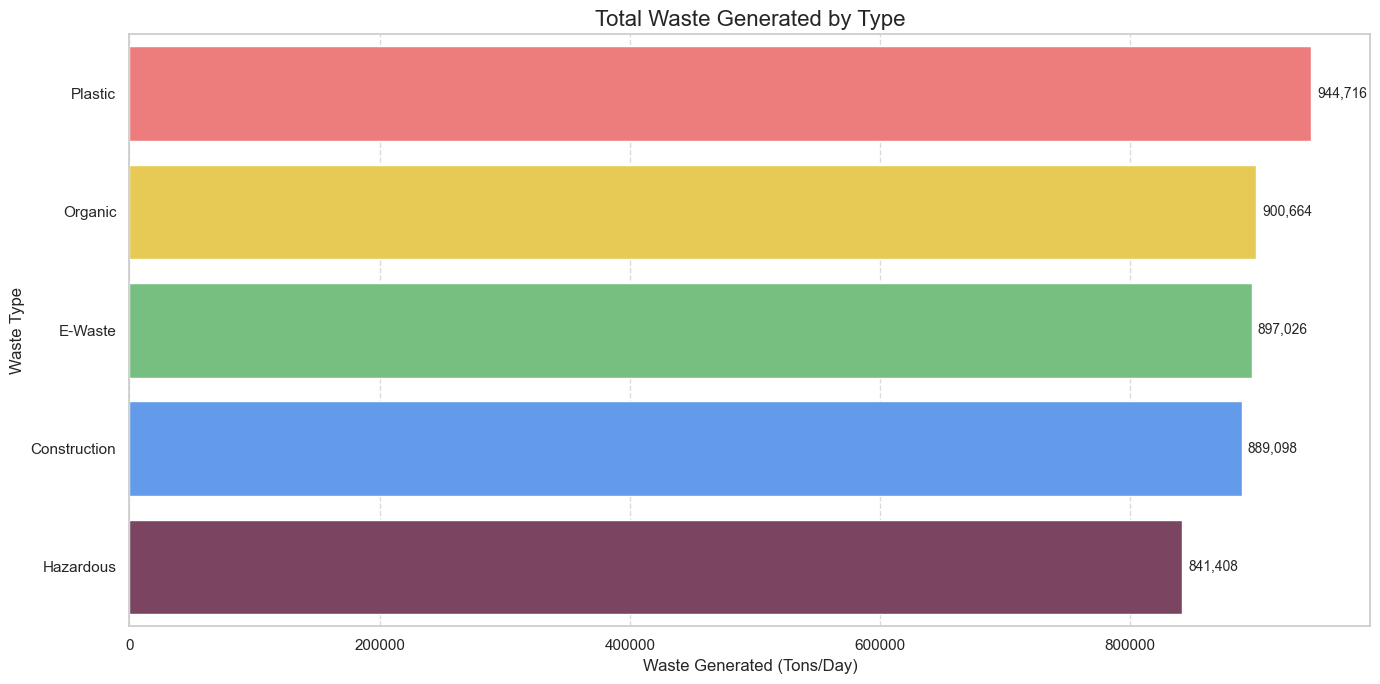

In [132]:
# Aggregate waste by type
waste_type_df = df.groupby('waste_type')['waste_generated_(tons/day)'].sum().reset_index()
waste_type_df.sort_values(by='waste_generated_(tons/day)', ascending=False, inplace=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='waste_generated_(tons/day)', y='waste_type', data=waste_type_df, palette=colorhunt_palette[:len(waste_type_df)])
plt.title('Total Waste Generated by Type', fontsize=16)
plt.xlabel('Waste Generated (Tons/Day)', fontsize=12)
plt.ylabel('Waste Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for i, v in enumerate(waste_type_df['waste_generated_(tons/day)']):
    plt.text(v + 5000, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### 6.2.5 Recycling Rate by City

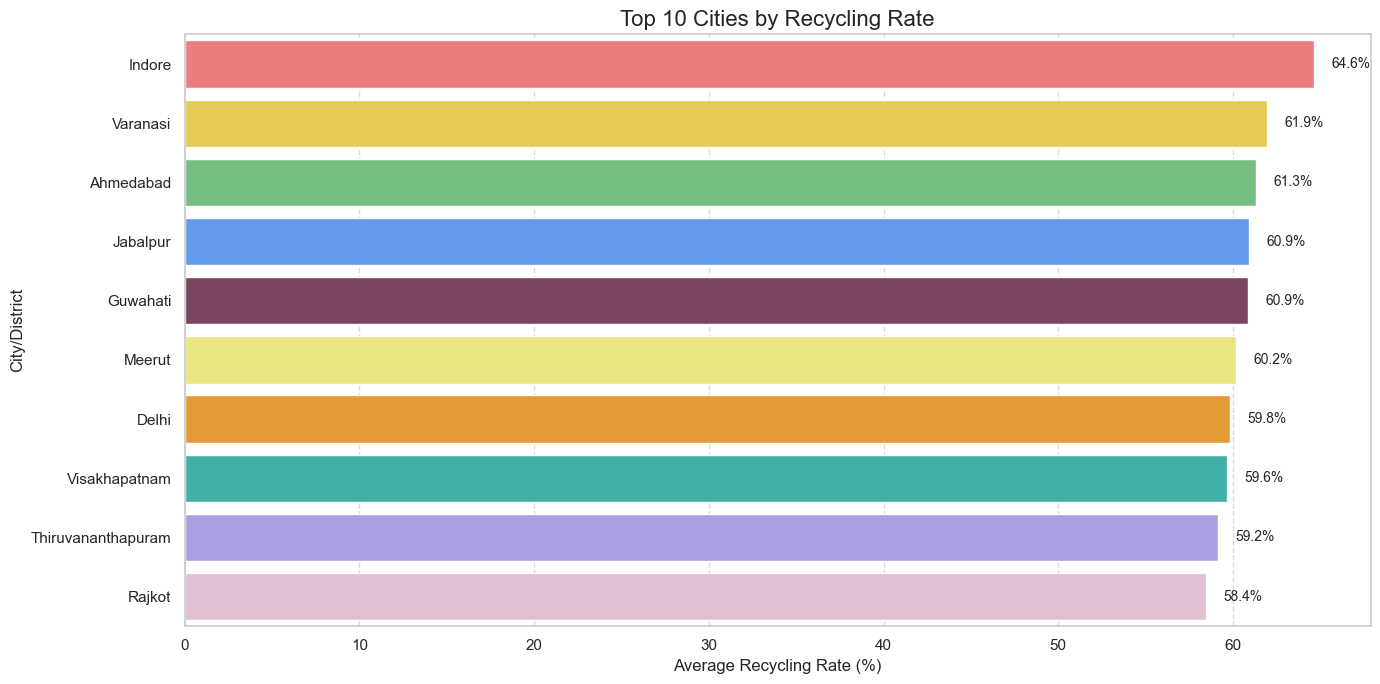

In [133]:
# average recycling rate by city
recycle_city = df.groupby('city/district')['recycling_rate_(%)'].mean().reset_index()
recycle_city = recycle_city.sort_values(by='recycling_rate_(%)', ascending=False)

# top 10 cities by recycling rate
plt.figure(figsize=(14, 7))
sns.barplot(x='recycling_rate_(%)', y='city/district', data=recycle_city.head(10), palette=colorhunt_palette)
plt.title('Top 10 Cities by Recycling Rate', fontsize=16)
plt.xlabel('Average Recycling Rate (%)', fontsize=12)
plt.ylabel('City/District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for i, v in enumerate(recycle_city.head(10)['recycling_rate_(%)']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### 6.2.6 Recycling Rate by Waste Type

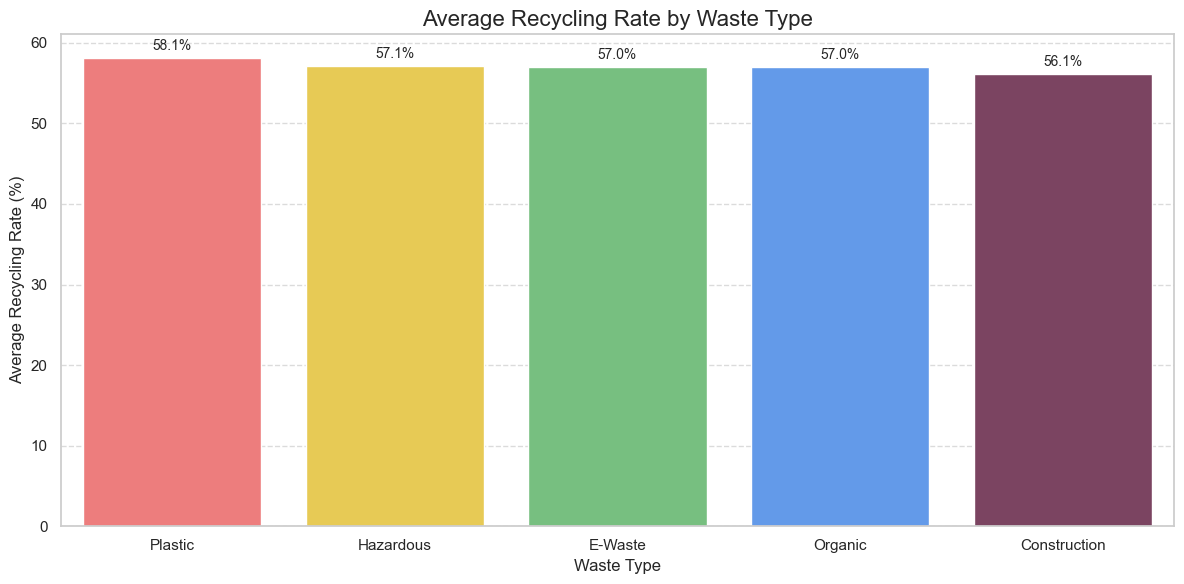

In [134]:
# Calculate average recycling rate by waste type
recycling_waste = df.groupby('waste_type')['recycling_rate_(%)'].mean().reset_index()
recycling_waste = recycling_waste.sort_values(by='recycling_rate_(%)', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='waste_type', y='recycling_rate_(%)', data=recycling_waste, palette=colorhunt_palette[:len(recycling_waste)])
plt.title('Average Recycling Rate by Waste Type', fontsize=16)
plt.xlabel('Waste Type', fontsize=12)
plt.ylabel('Average Recycling Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 1, f'{p.get_height():.1f}%', 
            ha="center", fontsize=10)

plt.tight_layout()
plt.show()

### 6.2.7 Cost of Management by Waste Type

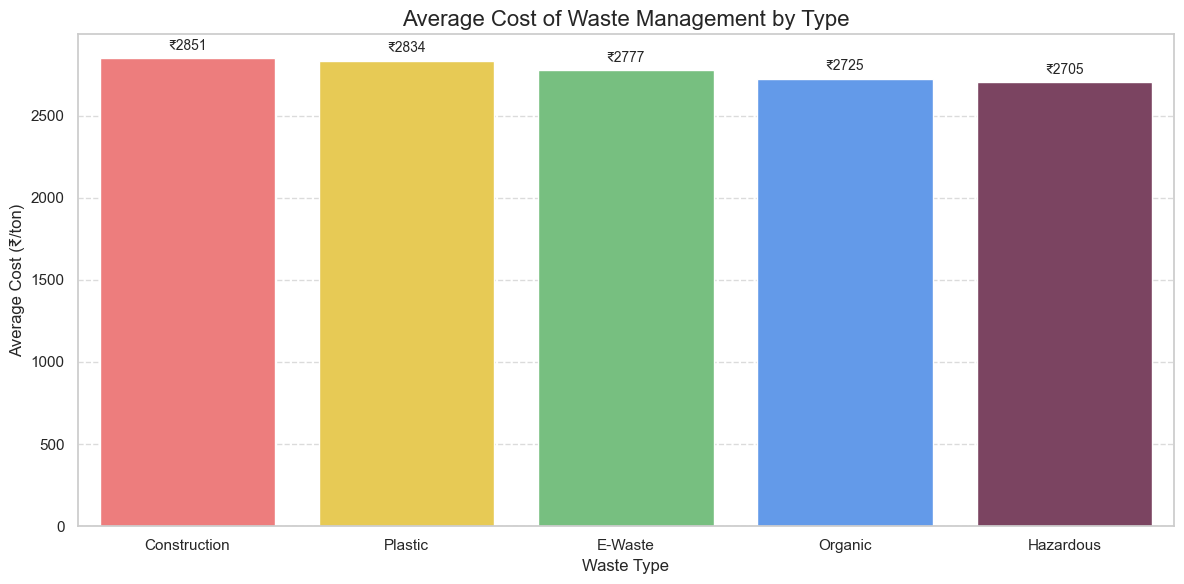

In [135]:
# average cost of management by waste type
cost_of_mgmt_waste = df.groupby('waste_type')['cost_of_waste_management_(₹/ton)'].mean().reset_index()
cost_of_mgmt_waste = cost_of_mgmt_waste.sort_values(by='cost_of_waste_management_(₹/ton)', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='waste_type', y='cost_of_waste_management_(₹/ton)', data=cost_of_mgmt_waste, palette=colorhunt_palette[:len(cost_of_mgmt_waste)])
plt.title('Average Cost of Waste Management by Type', fontsize=16)
plt.xlabel('Waste Type', fontsize=12)
plt.ylabel('Average Cost (₹/ton)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# data labels
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 50, f'₹{p.get_height():.0f}', 
            ha="center", fontsize=10)

plt.tight_layout()
plt.show()

### 6.2.8 Municipal Efficiency Score by City

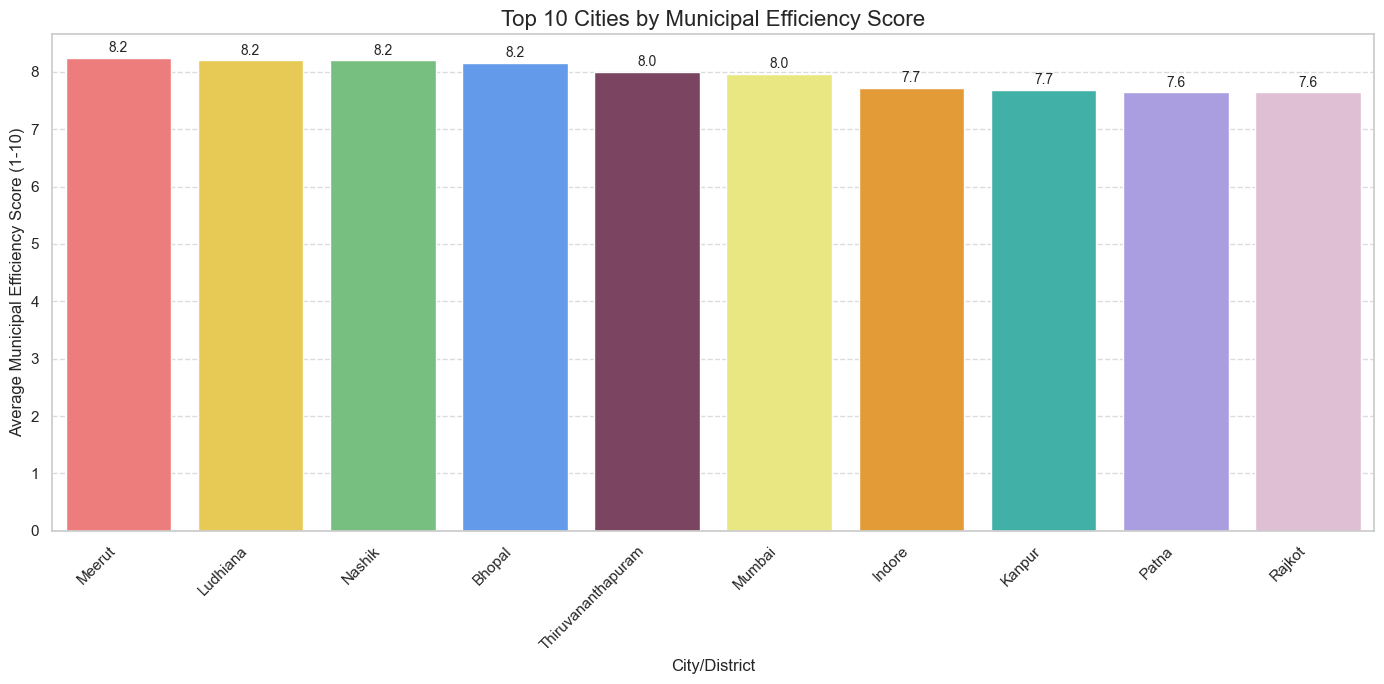

In [136]:
# Calculate average municipal efficiency score by city
score_city = df.groupby('city/district')['municipal_efficiency_score_(1_10)'].mean().reset_index()
score_city = score_city.sort_values(by='municipal_efficiency_score_(1_10)', ascending=False)

# top 10 cities by municipal efficiency score
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='city/district', y='municipal_efficiency_score_(1_10)', data=score_city.head(10), palette=colorhunt_palette)
plt.title('Top 10 Cities by Municipal Efficiency Score', fontsize=16)
plt.xlabel('City/District', fontsize=12)
plt.ylabel('Average Municipal Efficiency Score (1-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# data labels
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 0.1, f'{p.get_height():.1f}', 
            ha="center", fontsize=10)

plt.tight_layout()
plt.show()

## 6.3 Multi-Variate Analysis

### 6.3.1 Waste Generation by City and Waste Type

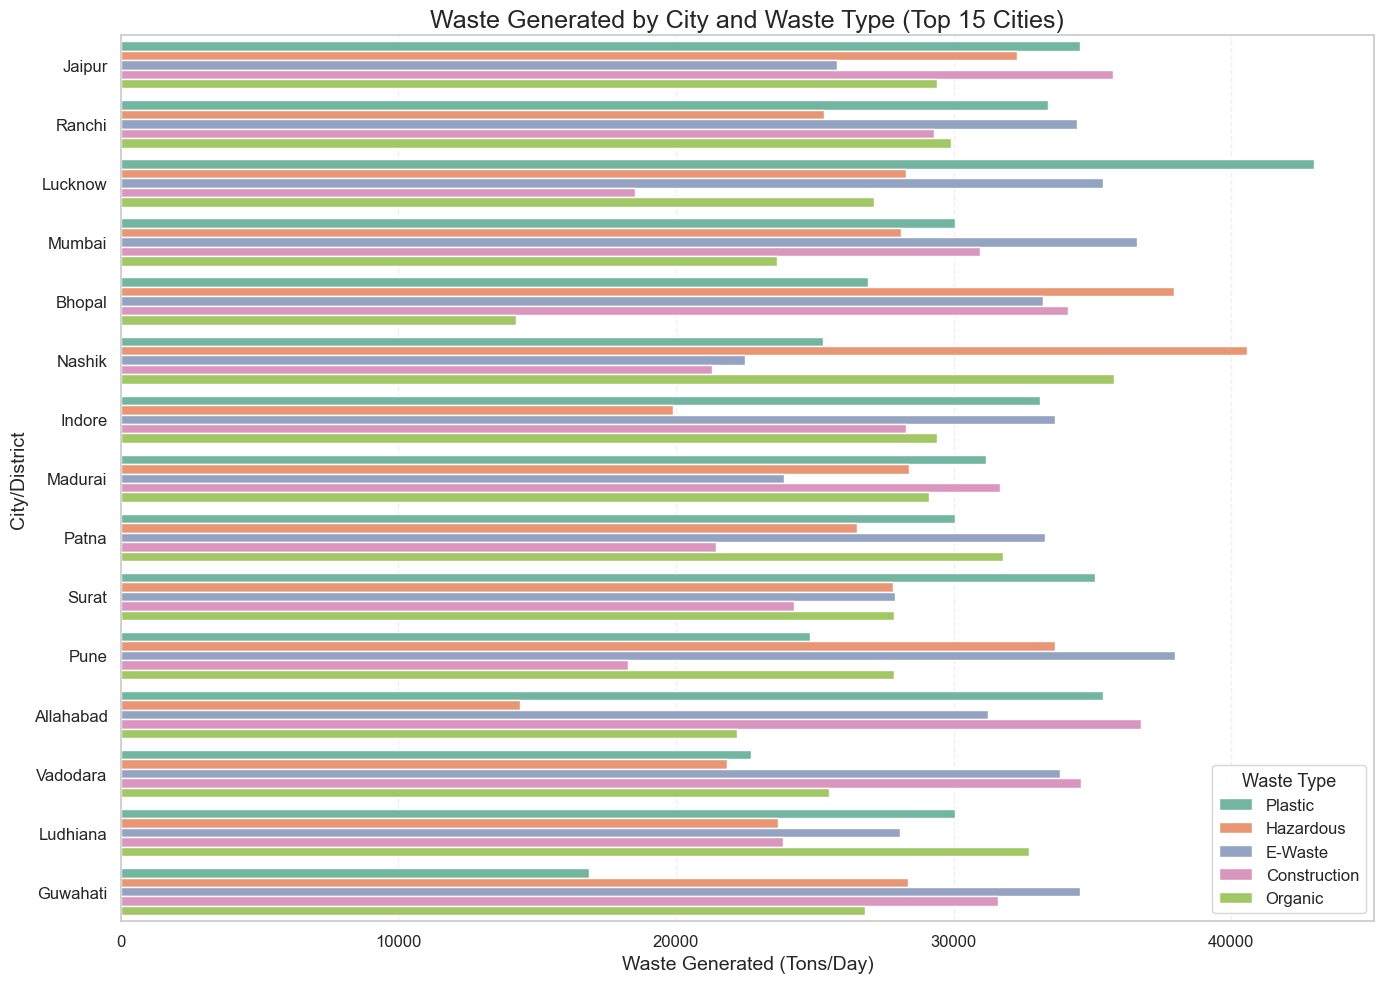

In [137]:
# Group by city and waste type
waste_city_type = df.groupby(['city/district','waste_type'])['waste_generated_(tons/day)'].sum().reset_index()
waste_city_type.sort_values(by='waste_generated_(tons/day)', ascending=False, inplace=True)

# Calculate total waste per city for sorting
city_order = waste_city_type.groupby('city/district')['waste_generated_(tons/day)'].sum().sort_values(ascending=False).index

# Limit to top 15 cities for clarity
top_cities = city_order[:15]
filtered_data = waste_city_type[waste_city_type['city/district'].isin(top_cities)]

plt.figure(figsize=(14, 10))
sns.barplot(
    x='waste_generated_(tons/day)',
    y='city/district',
    hue='waste_type',
    data=filtered_data,
    order=top_cities,
    palette='Set2'
)
plt.title('Waste Generated by City and Waste Type (Top 15 Cities)', fontsize=18)
plt.xlabel('Waste Generated (Tons/Day)', fontsize=14)
plt.ylabel('City/District', fontsize=14)
plt.legend(title='Waste Type', fontsize=12, title_fontsize=13, loc='lower right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3.2 Recycling Rate by City and Municipal Efficiency Score

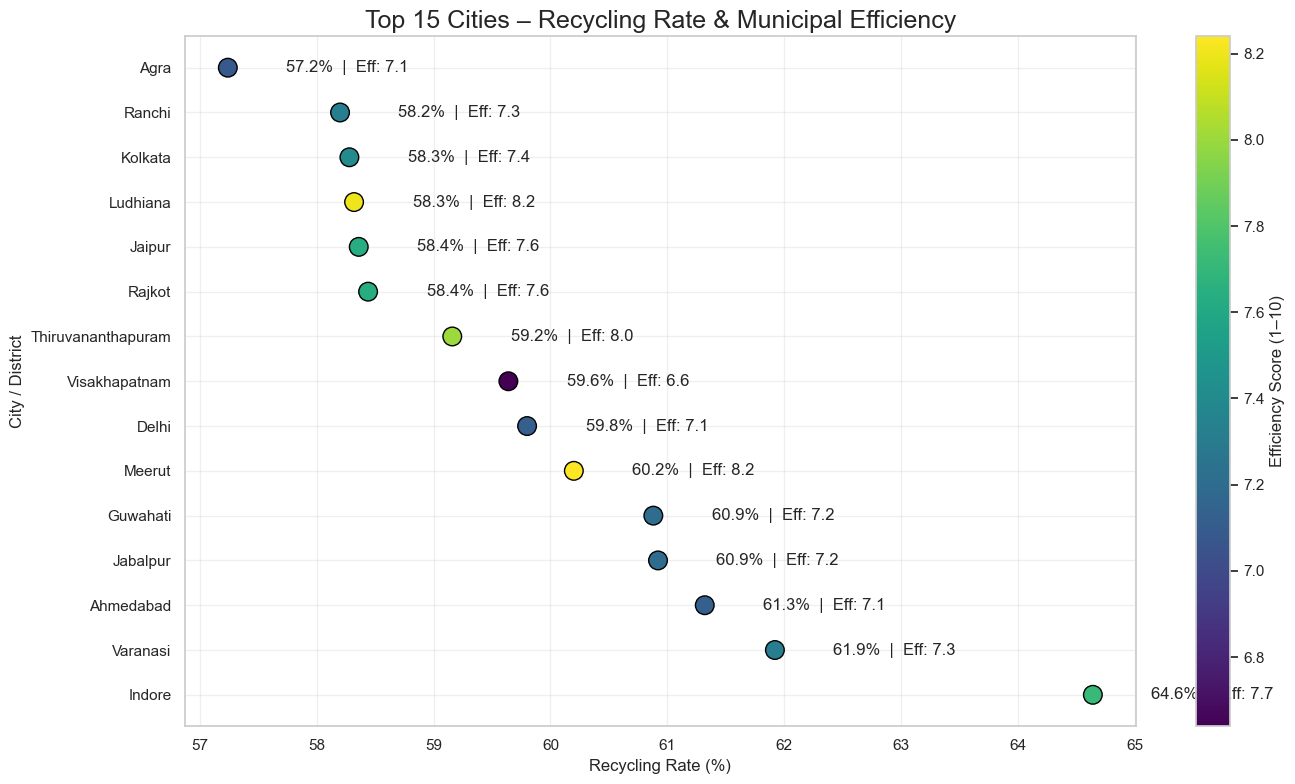

In [143]:
city_stats = (
    df.groupby('city/district')[['recycling_rate_(%)', 'municipal_efficiency_score_(1_10)']]
      .mean()
      .reset_index()
)
top_cities = city_stats.sort_values('recycling_rate_(%)', ascending=False).head(15)

plt.figure(figsize=(14, 8))
points = plt.scatter(
    top_cities['recycling_rate_(%)'],
    top_cities['city/district'],
    c=top_cities['municipal_efficiency_score_(1_10)'],
    cmap='viridis',
    s=180,
    edgecolor='black'
)

plt.title('Top 15 Cities – Recycling Rate & Municipal Efficiency', fontsize=18)
plt.xlabel('Recycling Rate (%)')
plt.ylabel('City / District')
plt.grid(alpha=0.3)

cbar = plt.colorbar(points)
cbar.set_label('Efficiency Score (1–10)')

for rate, city, eff in zip(top_cities['recycling_rate_(%)'], top_cities['city/district'], top_cities['municipal_efficiency_score_(1_10)']):
    plt.text(rate + 0.5, city, f'{rate:.1f}%  |  Eff: {eff:.1f}', va='center')

plt.tight_layout()
plt.show()


### 6.3.3 Recycling Rate by Waste Type and Disposal Method

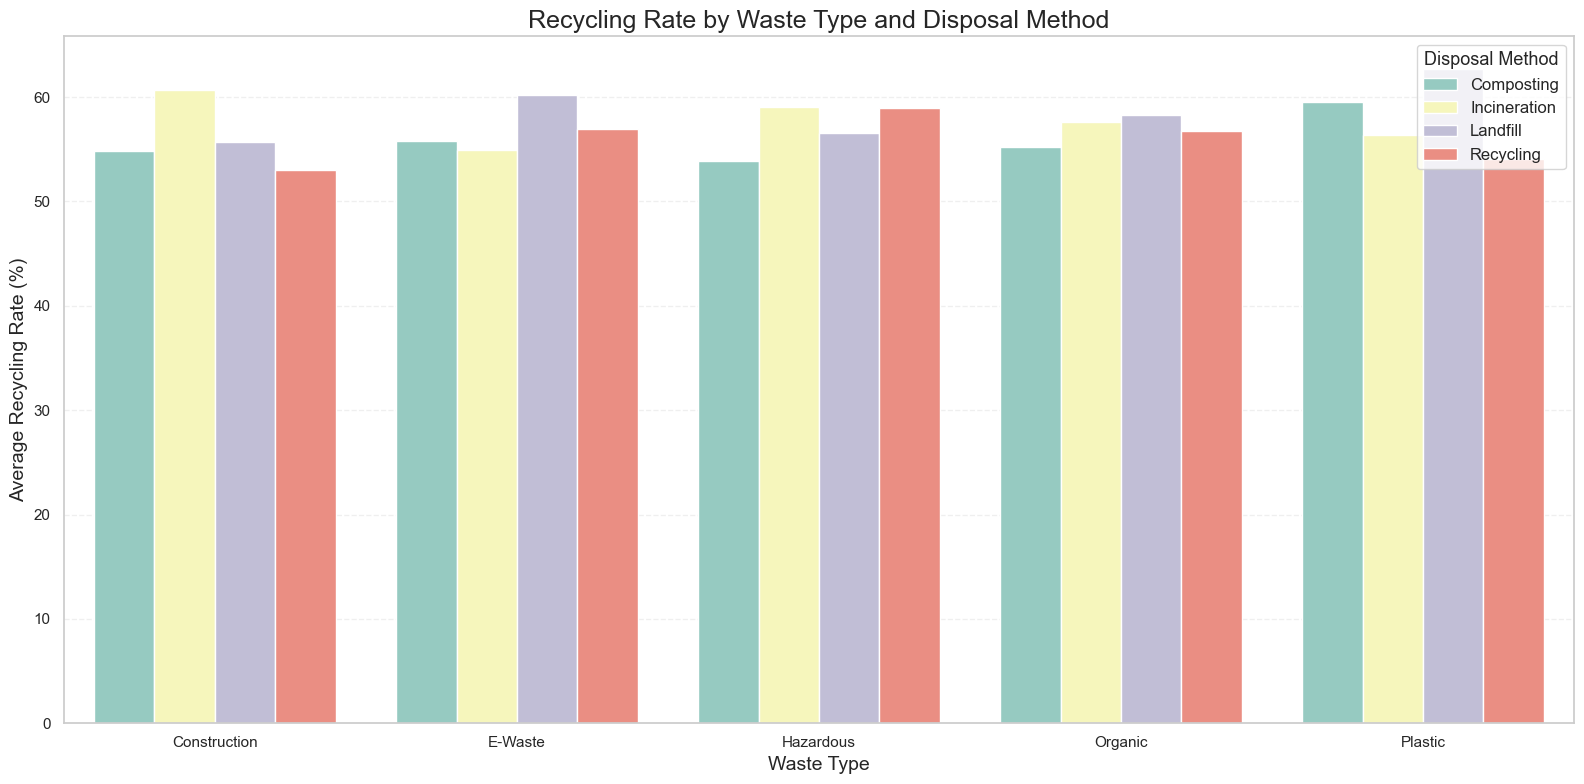

In [139]:
# Group by waste type and disposal method
recycle_type_disposal = df.groupby(['waste_type', 'disposal_method'])['recycling_rate_(%)'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(
    x='waste_type', 
    y='recycling_rate_(%)', 
    hue='disposal_method', 
    data=recycle_type_disposal,
    palette='Set3'
)
plt.title('Recycling Rate by Waste Type and Disposal Method', fontsize=18)
plt.xlabel('Waste Type', fontsize=14)
plt.ylabel('Average Recycling Rate (%)', fontsize=14)
plt.legend(title='Disposal Method', fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### 6.3.4 Cost vs Recycling Rate by Waste Type

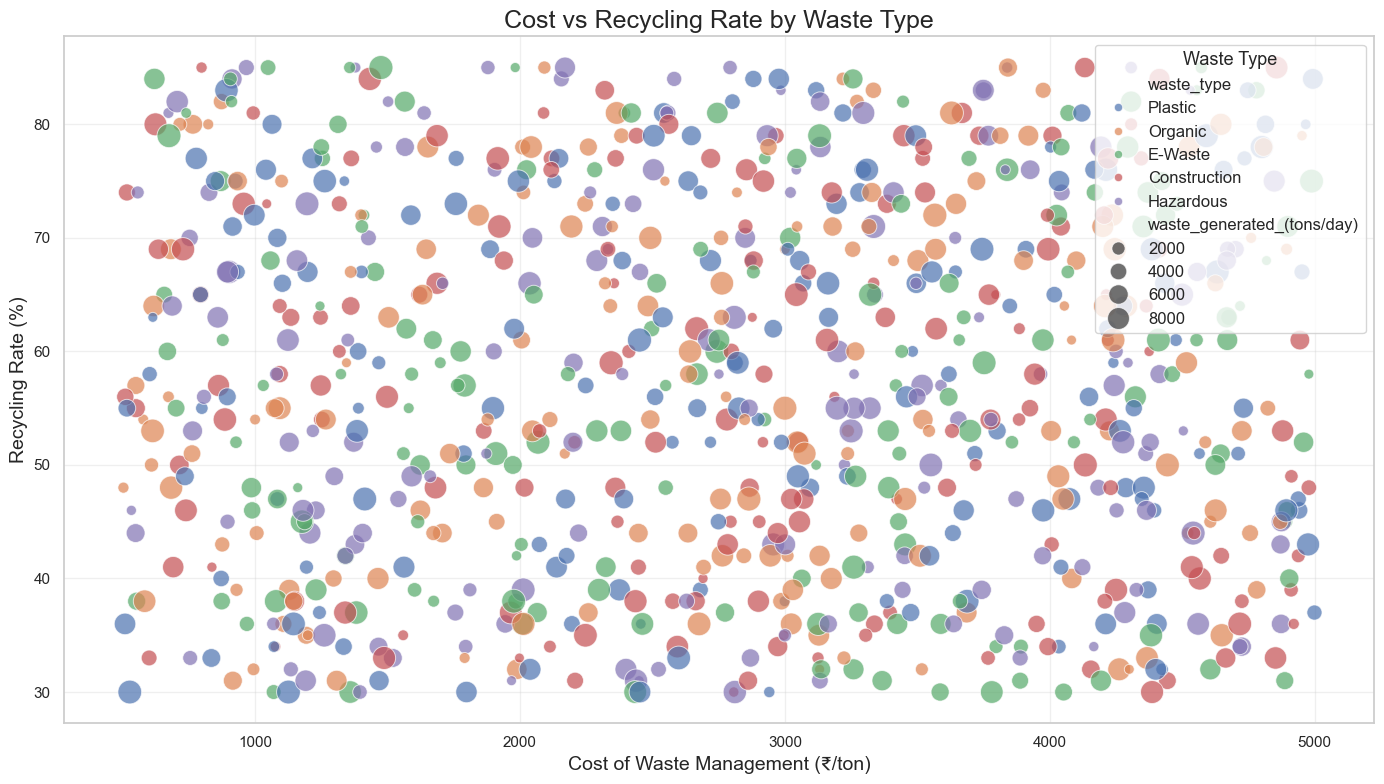

In [140]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df, 
    x='cost_of_waste_management_(₹/ton)', 
    y='recycling_rate_(%)', 
    hue='waste_type',
    size='waste_generated_(tons/day)',
    sizes=(50, 300),
    alpha=0.7
)
plt.title('Cost vs Recycling Rate by Waste Type', fontsize=18)
plt.xlabel('Cost of Waste Management (₹/ton)', fontsize=14)
plt.ylabel('Recycling Rate (%)', fontsize=14)
plt.legend(title='Waste Type', fontsize=12, title_fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 6.3.5 Awareness Campaigns Impact on Recycling

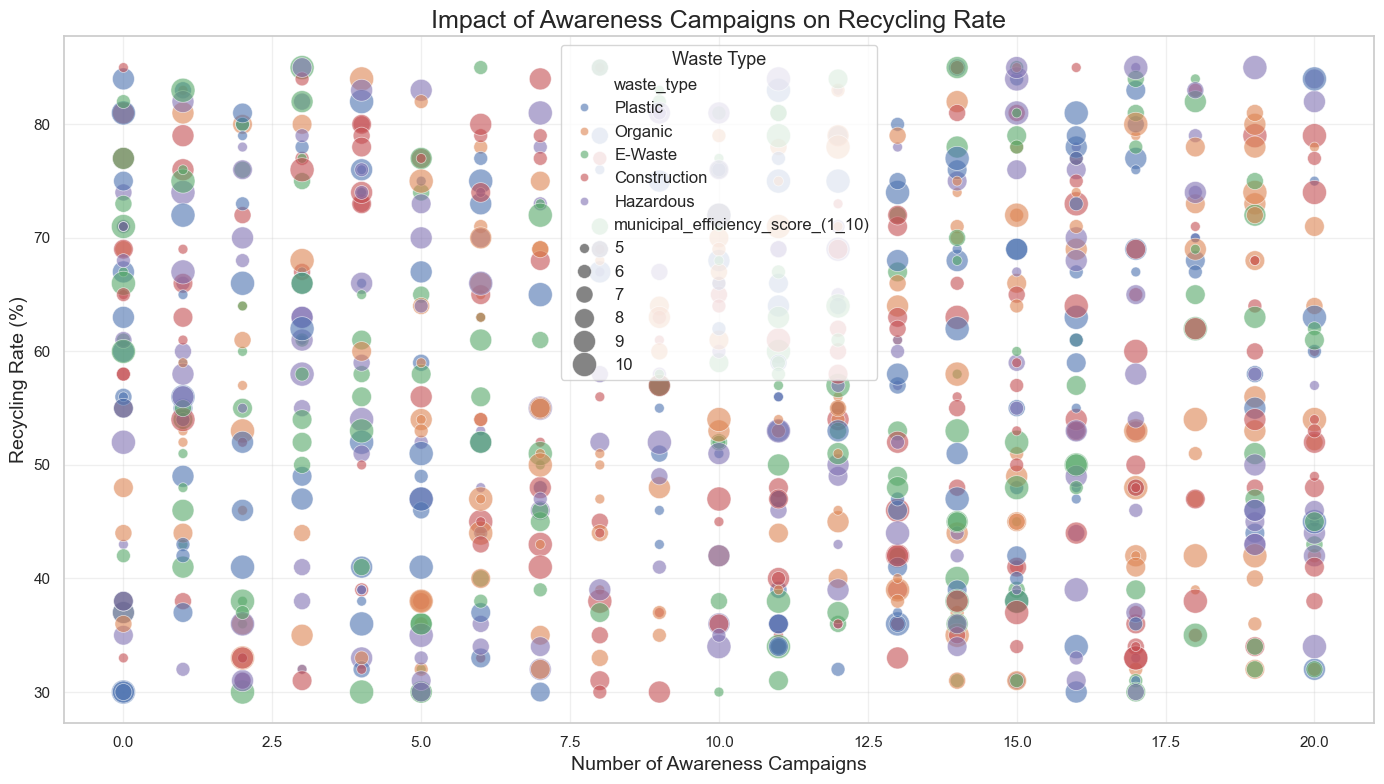

In [141]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df, 
    x='awareness_campaigns_count', 
    y='recycling_rate_(%)',
    hue='waste_type',
    size='municipal_efficiency_score_(1_10)',
    sizes=(50, 300),
    alpha=0.6
)
plt.title('Impact of Awareness Campaigns on Recycling Rate', fontsize=18)
plt.xlabel('Number of Awareness Campaigns', fontsize=14)
plt.ylabel('Recycling Rate (%)', fontsize=14)
plt.legend(title='Waste Type', fontsize=12, title_fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 6.3.6 Pairplot

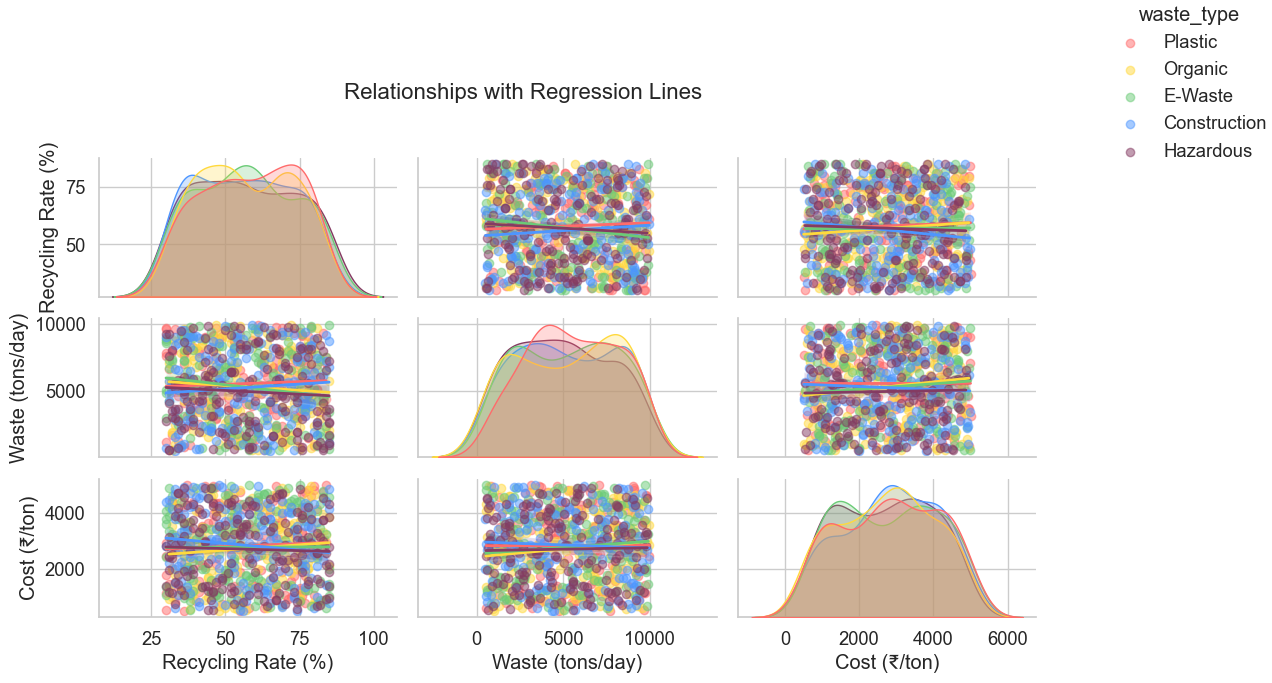

In [170]:
key_vars = {
    'recycling_rate_(%)': 'Recycling Rate (%)',
    'waste_generated_(tons/day)': 'Waste (tons/day)',
    'cost_of_waste_management_(₹/ton)': 'Cost (₹/ton)',
    'waste_type': 'waste_type'
}


sns.set_style("whitegrid")

# reg pairplot
g = sns.pairplot(
    df[key_vars.keys()].rename(columns=key_vars),
    hue='waste_type',
    kind='reg',
    height=2,
    aspect=1.5,
    plot_kws={'line_kws':{'linewidth':2}, 'scatter_kws':{'alpha':0.5}},
    palette=colorhunt_palette[:5]
)


g.fig.suptitle('Relationships with Regression Lines', y=1.02, fontsize=16)
g._legend.set_bbox_to_anchor((1.2, 1))
plt.tight_layout()
plt.show()

In [152]:
print(df.columns.tolist())

['city/district', 'waste_type', 'waste_generated_(tons/day)', 'recycling_rate_(%)', 'population_density_(people/km²)', 'municipal_efficiency_score_(1_10)', 'disposal_method', 'cost_of_waste_management_(₹/ton)', 'awareness_campaigns_count', 'landfill_name', 'landfill_location_(lat,_long)', 'landfill_capacity_(tons)', 'year']


# 7. Key Insights and Findings

From our exploratory data analysis, several important insights emerge:

1. **Waste Generation Patterns**:
   - Construction and e-waste are the highest volume waste types across Indian cities
   - Jaipur, Ranchi, and Lucknow are the top waste-generating cities
   - There is significant variation in waste generation volumes across cities

2. **Recycling Performance**:
   - Average recycling rate is 57%, with significant room for improvement
   - Cities with higher municipal efficiency scores tend to have better recycling rates
   - Certain waste types (e.g., plastic) show higher recycling rates than others

3. **Municipal Efficiency Impact**:
   - Clear correlation between municipal efficiency scores and recycling success
   - Higher efficiency cities demonstrate better waste management practices
   - Investment in municipal systems appears to yield recycling benefits

4. **Cost Factors**:
   - Wide variation in waste management costs across waste types and cities
   - Some high-cost systems don't necessarily yield better recycling results
   - Opportunity for cost optimization while maintaining recycling performance

5. **Awareness Campaigns**:
   - Some correlation between awareness campaign frequency and recycling rates
   - Effect varies by waste type and city characteristics
   - Targeted awareness campaigns could improve recycling performance

6. **Future Directions**:
   - Machine learning models can predict recycling rates based on these features
   - Focus on improving municipal efficiency for greatest impact
   - Target interventions on high-waste, low-recycling cities
   - Implement best practices from high-performing cities